In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [123]:
df=pd.read_csv('./archive/Shopping Mall Customer Segmentation Data .csv')

In [108]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [109]:
df.isna().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

In [110]:
df.drop(columns=['Customer ID'], inplace=True)

In [111]:
df.head()

,Age,Gender,Annual Income,Spending Score
0,30,Male,151479,89
1,58,Female,185088,95
2,62,Female,70912,76
3,23,Male,55460,57
4,24,Male,153752,76


In [112]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

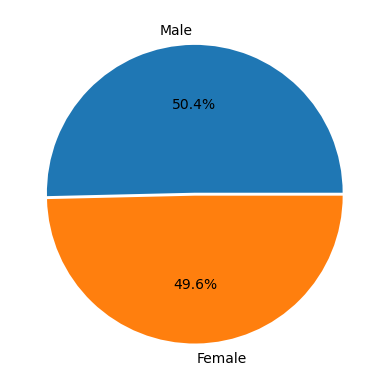

In [113]:
labels=['Male', 'Female']
plt.pie(df['Gender'].value_counts(), explode=(0.01, 0.01), autopct='%1.1f%%', labels=labels)
plt.show()

In [114]:
df['Gender'].value_counts()

Male      7595
Female    7484
Name: Gender, dtype: int64

In [115]:
print("Maxm salary (Male):", df[df['Gender']=='Male']['Annual Income'].max())
print("Minm salary (Male):", df[df['Gender']=='Male']['Annual Income'].min())

Maxm salary (Male): 199974
Minm salary (Male): 20026


In [116]:
print("Maxm salary (Female):", df[df['Gender']=='Female']['Annual Income'].max())
print("Minm salary (Female):", df[df['Gender']=='Female']['Annual Income'].min())

Maxm salary (Female): 199963
Minm salary (Female): 20022


In [121]:
print("Maxm Spending Score:", df['Spending Score'].max())
print("Minm Spending Score:", df['Spending Score'].min())

Maxm Spending Score: 100
Minm Spending Score: 1


In [126]:
df['Gender']=df['Gender'].replace({'Male': 0, 'Female': 1})

In [127]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,0,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,1,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,1,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,0,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,0,153752,76


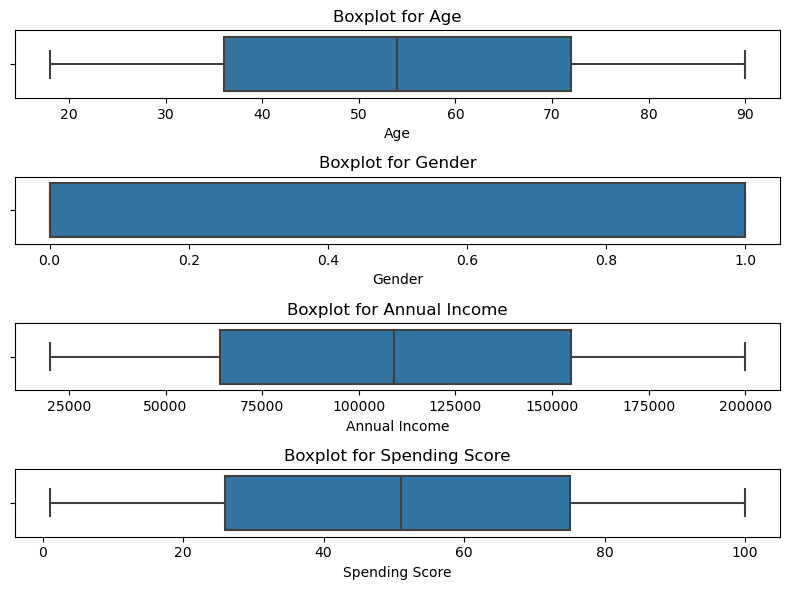

In [133]:
num_columns = df.select_dtypes(include=['number']).columns
num_plots = len(num_columns)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6))

for i, column in enumerate(num_columns):

    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

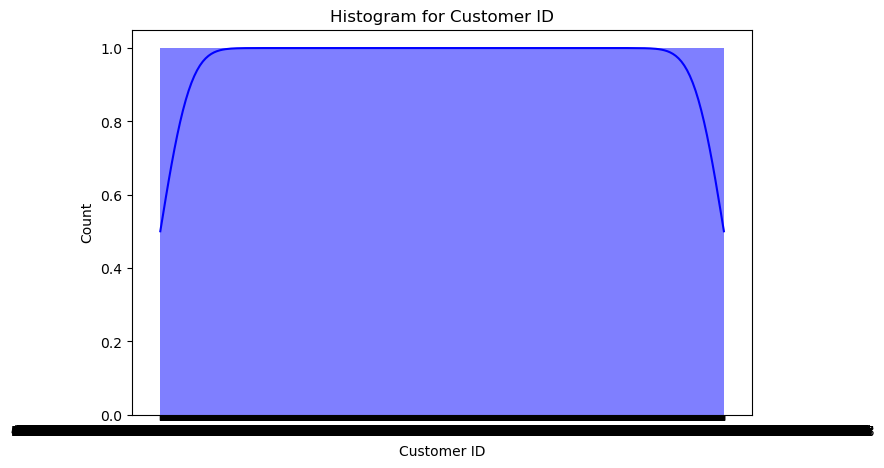

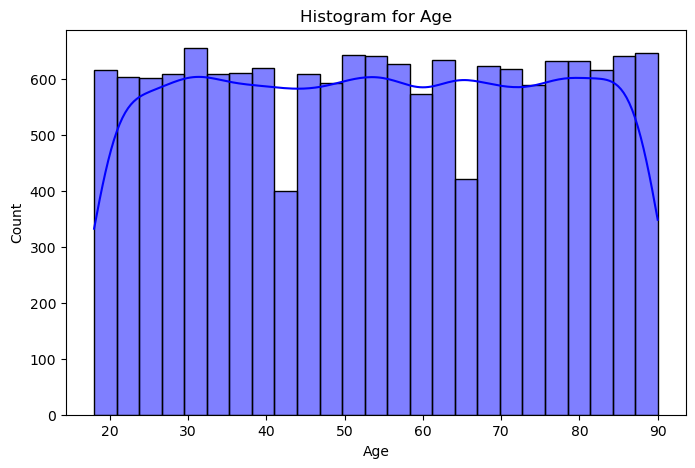

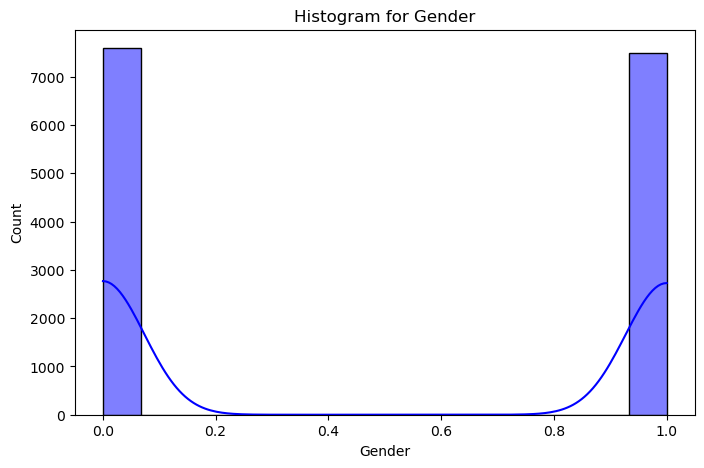

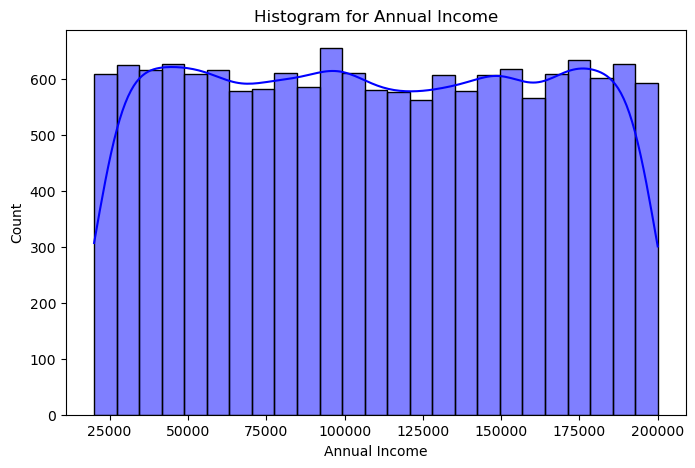

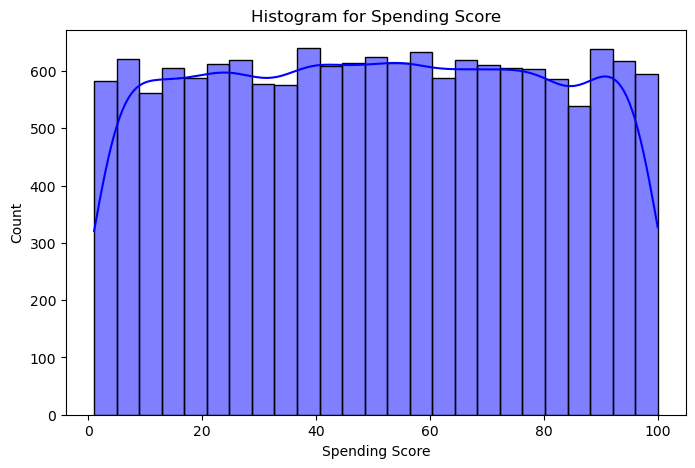

In [147]:
for column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, color="blue")
    plt.title(f'Histogram for {column}')
    plt.show()

In [51]:
X.head()

,Age,Gender,Annual Income
0,30,1,151479
1,58,0,185088
2,62,0,70912
3,23,1,55460
4,24,1,153752


In [52]:
y.head()

0    89
1    95
2    76
3    57
4    76
Name: Spending Score, dtype: int64

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (12063, 3)
X_test: (3016, 3)
y_train: (12063,)
y_test: (3016,)


In [55]:
linear_model=LinearRegression()

In [57]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred=linear_model.predict(X_test)

In [62]:
print(r2_score(y_test, y_pred))

1.0
